In [0]:
!wget https://s3.eu-central-1.amazonaws.com/avg-kitti/raw_data/2011_09_26_drive_0048/2011_09_26_drive_0048_sync.zip
!wget https://s3.eu-central-1.amazonaws.com/avg-kitti/raw_data/2011_09_26_calib.zip
!wget https://s3.eu-central-1.amazonaws.com/avg-kitti/raw_data/2011_09_26_drive_0048/2011_09_26_drive_0048_tracklets.zip

--2019-11-30 07:23:53--  https://s3.eu-central-1.amazonaws.com/avg-kitti/raw_data/2011_09_26_drive_0048/2011_09_26_drive_0048_sync.zip
Resolving s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)... 52.219.74.187
Connecting to s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)|52.219.74.187|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83650171 (80M) [application/zip]
Saving to: ‘2011_09_26_drive_0048_sync.zip’

2011_09_26_drive_00 100%[===================>]  79.77M  20.6MB/s    in 4.8s    

2019-11-30 07:23:59 (16.7 MB/s) - ‘2011_09_26_drive_0048_sync.zip’ saved [83650171/83650171]

--2019-11-30 07:24:00--  https://s3.eu-central-1.amazonaws.com/avg-kitti/raw_data/2011_09_26_calib.zip
Resolving s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)... 52.219.73.127
Connecting to s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)|52.219.73.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 406

In [0]:
!unzip 2011_09_26_drive_0048_sync.zip
!unzip 2011_09_26_calib.zip
!unzip 2011_09_26_drive_0048_tracklets.zip

Archive:  2011_09_26_drive_0048_sync.zip
replace 2011_09_26/2011_09_26_drive_0048_sync/oxts/timestamps.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Archive:  2011_09_26_calib.zip
replace 2011_09_26/calib_cam_to_cam.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Archive:  2011_09_26_drive_0048_tracklets.zip
replace 2011_09_26/2011_09_26_drive_0048_sync/tracklet_labels.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [0]:
!pip3 install pykitti
!wget https://raw.githubusercontent.com/navoshta/KITTI-Dataset/master/source/parseTrackletXML.py

--2019-11-30 07:26:56--  https://raw.githubusercontent.com/navoshta/KITTI-Dataset/master/source/parseTrackletXML.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12667 (12K) [text/plain]
Saving to: ‘parseTrackletXML.py’

parseTrackletXML.py 100%[===================>]  12.37K  --.-KB/s    in 0s      

2019-11-30 07:26:56 (174 MB/s) - ‘parseTrackletXML.py’ saved [12667/12667]



In [0]:
import pykitti

dataset = pykitti.raw('.', '2011_09_26', '0048')
dataset.calib

CalibData(T_velo_imu=array([[ 9.999976e-01,  7.553071e-04, -2.035826e-03, -8.086759e-01],
       [-7.854027e-04,  9.998898e-01, -1.482298e-02,  3.195559e-01],
       [ 2.024406e-03,  1.482454e-02,  9.998881e-01, -7.997231e-01],
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00,  1.000000e+00]]), T_cam0_velo_unrect=array([[ 7.533745e-03, -9.999714e-01, -6.166020e-04, -4.069766e-03],
       [ 1.480249e-02,  7.280733e-04, -9.998902e-01, -7.631618e-02],
       [ 9.998621e-01,  7.523790e-03,  1.480755e-02, -2.717806e-01],
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00,  1.000000e+00]]), P_rect_00=array([[721.5377,   0.    , 609.5593,   0.    ],
       [  0.    , 721.5377, 172.854 ,   0.    ],
       [  0.    ,   0.    ,   1.    ,   0.    ]]), P_rect_10=array([[ 721.5377,    0.    ,  609.5593, -387.5744],
       [   0.    ,  721.5377,  172.854 ,    0.    ],
       [   0.    ,    0.    ,    1.    ,    0.    ]]), P_rect_20=array([[7.215377e+02, 0.000000e+00, 6.095593e+02, 4.485728e+01],

In [0]:
dataset_gray = list(dataset.gray)
dataset_rgb = list(dataset.rgb)
dataset_velo = list(dataset.velo)

In [0]:
dataset_gray[0]

(<PIL.Image.Image image mode=L size=1242x375 at 0x7FEA72B534A8>,
 <PIL.Image.Image image mode=L size=1242x375 at 0x7FEA72B530F0>)

In [0]:
dataset_velo[0][0]

array([52.301,  7.3  ,  1.995,  0.12 ], dtype=float32)

In [0]:
lidar = dataset_velo[0]
lidar = lidar[::int(0.00005 * lidar.shape[0])]
dataset_velo[0].shape, lidar.shape


((119977, 4), (23996, 4))

In [0]:
x = lidar[:, 0]
y = lidar[:, 1]
z = lidar[:, 2]

x.min(), x.max(), y.min(), y.max(), z.min(), z.max()


(-77.813, 79.923, -24.962, 35.678, -16.737, 2.642)

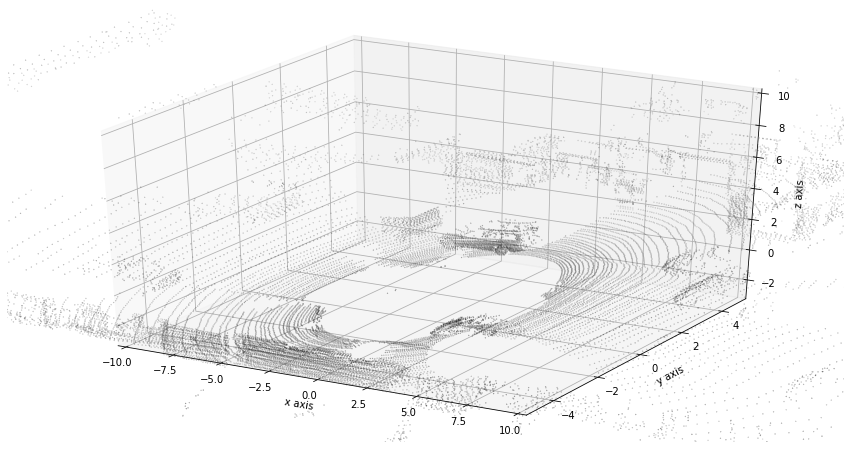

In [0]:
percent_use = 0.2

points_step = int(1. / percent_use)
point_size = 0.01 * (1. / percent_use)
velo_range = range(0, dataset_velo[0].shape[0], points_step)
velo_frame = dataset_velo[0][velo_range, :]

axes_limits = [
    [-10, 10], # X axis range
    [-5, 5], # Y axis range
    [-3, 10]   # Z axis range
]

f = plt.figure(figsize=(15, 8))
ax = f.add_subplot(111, projection='3d')

ax.scatter(velo_frame[:,0], velo_frame[:,1], velo_frame[:,2], s=point_size, c=velo_frame[:, 3], cmap='gray')
ax.set_xlim3d(*axes_limits[0])
ax.set_ylim3d(*axes_limits[1])
ax.set_zlim3d(*axes_limits[2])

ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.show()


In [0]:
import numpy as np

def load_tracklets_for_frames(n_frames, xml_path):
    tracklets = xmlParser.parseXML(xml_path)

    frame_tracklets = {}
    frame_tracklets_types = {}
    for i in range(n_frames):
        frame_tracklets[i] = []
        frame_tracklets_types[i] = []

    for i, tracklet in enumerate(tracklets):
        h, w, l = tracklet.size
        trackletBox = np.array([
            [-l / 2, -l / 2, l / 2, l / 2, -l / 2, -l / 2, l / 2, l / 2],
            [w / 2, -w / 2, -w / 2, w / 2, w / 2, -w / 2, -w / 2, w / 2],
            [0.0, 0.0, 0.0, 0.0, h, h, h, h]
        ])
        for translation, rotation, state, occlusion, truncation, amtOcclusion, amtBorders, absoluteFrameNumber in tracklet:
            if truncation not in (xmlParser.TRUNC_IN_IMAGE, xmlParser.TRUNC_TRUNCATED):
                continue
            yaw = rotation[2]
            assert np.abs(rotation[:2]).sum() == 0, 'object rotations other than yaw given!'
            rotMat = np.array([
                [np.cos(yaw), -np.sin(yaw), 0.0],
                [np.sin(yaw), np.cos(yaw), 0.0],
                [0.0, 0.0, 1.0]
            ])
            cornerPosInVelo = np.dot(rotMat, trackletBox) + np.tile(translation, (8, 1)).T
            frame_tracklets[absoluteFrameNumber] = frame_tracklets[absoluteFrameNumber] + [cornerPosInVelo]
            frame_tracklets_types[absoluteFrameNumber] = frame_tracklets_types[absoluteFrameNumber] + [
                tracklet.objectType]

    return (frame_tracklets, frame_tracklets_types)


In [0]:
import parseTrackletXML as xmlParser

xml_path = '2011_09_26/2011_09_26_drive_0048_sync/tracklet_labels.xml'
tracklet_rects, tracklet_types = load_tracklets_for_frames(len(list(dataset.velo)), xml_path)


Parsing tracklet file 2011_09_26/2011_09_26_drive_0048_sync/tracklet_labels.xml
File contains 8 tracklets
Loaded 8 tracklets.


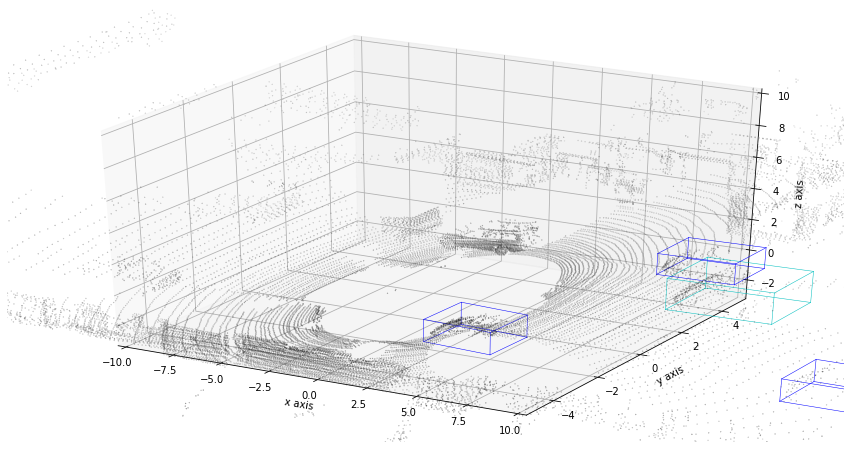

In [0]:
colors = {
    'Car': 'b',
    'Tram': 'r',
    'Cyclist': 'g',
    'Van': 'c',
    'Truck': 'm',
    'Pedestrian': 'y',
    'Sitter': 'k'
}

axes_limits = [
    [-10, 10], # X axis range
    [-5, 5], # Y axis range
    [-3, 10]   # Z axis range
]

f = plt.figure(figsize=(15, 8))
ax = f.add_subplot(111, projection='3d')

ax.scatter(velo_frame[:,0], velo_frame[:,1], velo_frame[:,2], s=point_size, c=velo_frame[:, 3], cmap='gray')
ax.set_xlim3d(*axes_limits[0])
ax.set_ylim3d(*axes_limits[1])
ax.set_zlim3d(*axes_limits[2])

ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')

for t_rects, t_type in zip(tracklet_rects[0], tracklet_types[0]):
    connections = [
        [0, 1], [1, 2], [2, 3], [3, 0],  # Lower plane parallel to Z=0 plane
        [4, 5], [5, 6], [6, 7], [7, 4],  # Upper plane parallel to Z=0 plane
        [0, 4], [1, 5], [2, 6], [3, 7]  # Connections between upper and lower planes
    ]
    for connection in connections:
        ax.plot(*t_rects[:, connection], c=colors[t_type], lw=0.5)
        
plt.show()

In [0]:
T = dataset.calib.T_cam3_velo
R = dataset.calib.R_rect_30
P = dataset.calib.P_rect_30
x = dataset_velo[0]
x.shape


(119977, 4)

In [0]:
x = x[x[:, 3] > 0 ,:]
x[:,3] = 1
x = x.T
x.shape

(4, 101212)

In [0]:
pts3d_cam = R.dot(T.dot(x))

idx = (pts3d_cam[2,:]>=0)
pts2d_cam = P.dot(pts3d_cam[:,idx])

pts2d = pts2d_cam/pts2d_cam[2,:]
pts3d_idx = x[:, idx]
pts3d_idx.shape, pts2d.shape


((4, 50246), (3, 50246))

In [0]:
img = dataset_rgb[0][1]

pts3d_idx = pts3d_idx[:, (pts2d[0] > 0) & (pts2d[0] < img.size[0]) \
& (pts2d[1] > 0) & (pts2d[1] < img.size[1])]
pts2d = pts2d[:, (pts2d[0] > 0) & (pts2d[0] < img.size[0]) \
& (pts2d[1] > 0) & (pts2d[1] < img.size[1])]
pts3d_idx.shape, pts2d.shape

((4, 12852), (3, 12852))

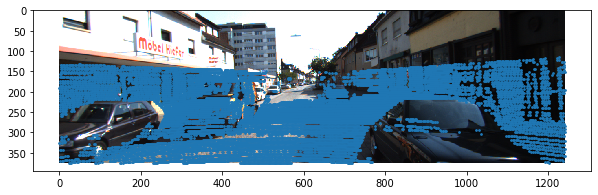

In [0]:
plt.figure(figsize = (10, 10))
plt.imshow(img)
plt.scatter(pts2d[0], pts2d[1], s = 3)
plt.show()

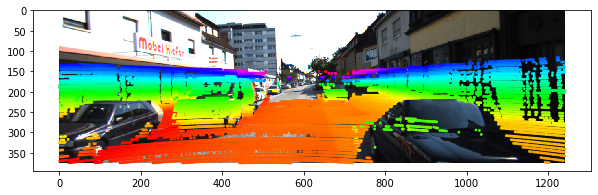

In [0]:
plt.figure(figsize = (10, 10))
plt.imshow(img)
plt.scatter(pts2d[0], pts2d[1], s = 3, c = pts3d_idx[2],
            cmap = 'hsv')
plt.show()
